In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

645

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00bddcf465f9581a3dbb0816d44eed08


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | nome
Processing Record 4 of Set 1 | los llanos de aridane
Processing Record 5 of Set 1 | castro
Processing Record 6 of Set 1 | rockhampton
Processing Record 7 of Set 1 | along
Processing Record 8 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 9 of Set 1 | tver
Processing Record 10 of Set 1 | cape town
Processing Record 11 of Set 1 | saint-paul
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | luderitz
Processing Record 14 of Set 1 | laguna
Processing Record 15 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 16 of Set 1 | narsaq
Processing Record 17 of Set 1 | marcona
City not found. Skipping...
Processing Record 18 of Set 1 | avarua
Processing Record 19 of Set 1 | sinnamary
Processing Record 20 of Set 1 | chuy
Processing Record 21 of Set 1 | taolanaro
City not found. 

Processing Record 43 of Set 4 | portland
Processing Record 44 of Set 4 | nguiu
City not found. Skipping...
Processing Record 45 of Set 4 | karangasem
Processing Record 46 of Set 4 | lasa
Processing Record 47 of Set 4 | cao bang
Processing Record 48 of Set 4 | solsvik
City not found. Skipping...
Processing Record 49 of Set 4 | new plymouth
Processing Record 50 of Set 4 | zhemtala
Processing Record 1 of Set 5 | tabukiniberu
City not found. Skipping...
Processing Record 2 of Set 5 | turbat
Processing Record 3 of Set 5 | makushino
Processing Record 4 of Set 5 | caravelas
Processing Record 5 of Set 5 | butaritari
Processing Record 6 of Set 5 | sao jose da coroa grande
Processing Record 7 of Set 5 | koscierzyna
Processing Record 8 of Set 5 | namibe
Processing Record 9 of Set 5 | axim
Processing Record 10 of Set 5 | hamilton
Processing Record 11 of Set 5 | donskoye
Processing Record 12 of Set 5 | thompson
Processing Record 13 of Set 5 | lourdes
Processing Record 14 of Set 5 | esna
Processing 

Processing Record 34 of Set 8 | banda aceh
Processing Record 35 of Set 8 | montrose
Processing Record 36 of Set 8 | cartagena
Processing Record 37 of Set 8 | furmanov
Processing Record 38 of Set 8 | avera
Processing Record 39 of Set 8 | aquiraz
Processing Record 40 of Set 8 | el ciruelo
Processing Record 41 of Set 8 | rungata
City not found. Skipping...
Processing Record 42 of Set 8 | santa rita do passa quatro
Processing Record 43 of Set 8 | zhigansk
Processing Record 44 of Set 8 | nanortalik
Processing Record 45 of Set 8 | cururupu
Processing Record 46 of Set 8 | alihe
Processing Record 47 of Set 8 | havoysund
Processing Record 48 of Set 8 | manado
Processing Record 49 of Set 8 | hithadhoo
Processing Record 50 of Set 8 | kodinsk
Processing Record 1 of Set 9 | san patricio
Processing Record 2 of Set 9 | saint-francois
Processing Record 3 of Set 9 | reconquista
Processing Record 4 of Set 9 | sitka
Processing Record 5 of Set 9 | kuching
Processing Record 6 of Set 9 | tual
Processing Rec

City not found. Skipping...
Processing Record 24 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 25 of Set 12 | berbera
Processing Record 26 of Set 12 | kalevala
Processing Record 27 of Set 12 | kerman
Processing Record 28 of Set 12 | majene
Processing Record 29 of Set 12 | ketchikan
Processing Record 30 of Set 12 | dulce nombre de culmi
Processing Record 31 of Set 12 | sorland
Processing Record 32 of Set 12 | tefe
Processing Record 33 of Set 12 | half moon bay
Processing Record 34 of Set 12 | grindavik
Processing Record 35 of Set 12 | we
City not found. Skipping...
Processing Record 36 of Set 12 | kasulu
Processing Record 37 of Set 12 | edd
Processing Record 38 of Set 12 | arlit
Processing Record 39 of Set 12 | launceston
Processing Record 40 of Set 12 | qiyang
Processing Record 41 of Set 12 | kuche
City not found. Skipping...
Processing Record 42 of Set 12 | aripuana
Processing Record 43 of Set 12 | togur
Processing Record 44 of Set 12 | camopi
Processing Record 45 of Set 12 

In [11]:
len(city_data)

597

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.12,-134.97,70.59,55,97,9.80,PF,2020-06-24 22:20:00
1,Nome,64.50,-165.41,46.99,56,90,8.05,US,2020-06-24 22:20:22
2,Los Llanos De Aridane,28.66,-17.92,73.40,69,75,17.22,ES,2020-06-24 22:20:23
3,Castro,-24.79,-50.01,57.25,87,18,4.65,BR,2020-06-24 22:19:42
4,Rockhampton,-23.38,150.50,48.20,81,0,3.67,AU,2020-06-24 22:20:23
5,Along,28.17,94.77,74.07,90,100,1.05,IN,2020-06-24 22:20:23
6,Tver,56.86,35.89,54.12,68,3,1.57,RU,2020-06-24 22:20:23
7,Cape Town,-33.93,18.42,60.01,67,1,11.41,ZA,2020-06-24 22:19:09
8,Saint-Paul,-21.01,55.27,69.80,73,2,12.75,RE,2020-06-24 22:20:23
9,Punta Arenas,-53.15,-70.92,39.20,69,75,16.11,CL,2020-06-24 22:20:18


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2020-06-24 22:20:00,-23.12,-134.97,70.59,55,97,9.80
1,Nome,US,2020-06-24 22:20:22,64.50,-165.41,46.99,56,90,8.05
2,Los Llanos De Aridane,ES,2020-06-24 22:20:23,28.66,-17.92,73.40,69,75,17.22
3,Castro,BR,2020-06-24 22:19:42,-24.79,-50.01,57.25,87,18,4.65
4,Rockhampton,AU,2020-06-24 22:20:23,-23.38,150.50,48.20,81,0,3.67
5,Along,IN,2020-06-24 22:20:23,28.17,94.77,74.07,90,100,1.05
6,Tver,RU,2020-06-24 22:20:23,56.86,35.89,54.12,68,3,1.57
7,Cape Town,ZA,2020-06-24 22:19:09,-33.93,18.42,60.01,67,1,11.41
8,Saint-Paul,RE,2020-06-24 22:20:23,-21.01,55.27,69.80,73,2,12.75
9,Punta Arenas,CL,2020-06-24 22:20:18,-53.15,-70.92,39.20,69,75,16.11


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [21]:
today = time.time()
today

1593045057.723469

In [22]:
today = time.strftime("%x")
today

'06/24/20'

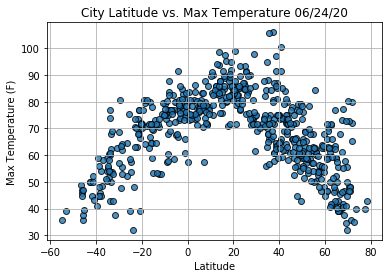

In [23]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

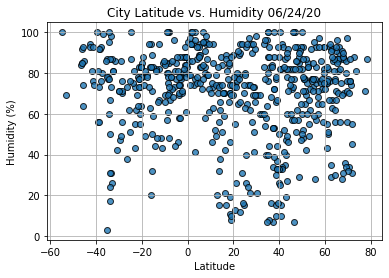

In [24]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

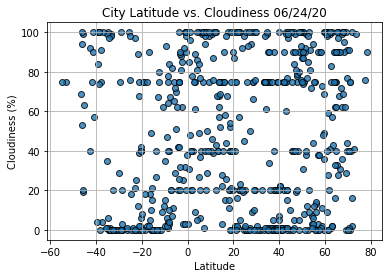

In [25]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

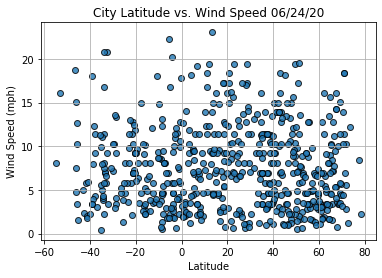

In [26]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()